# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available'].copy()
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

In [4]:
clean_hospital_read_df.head(100)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


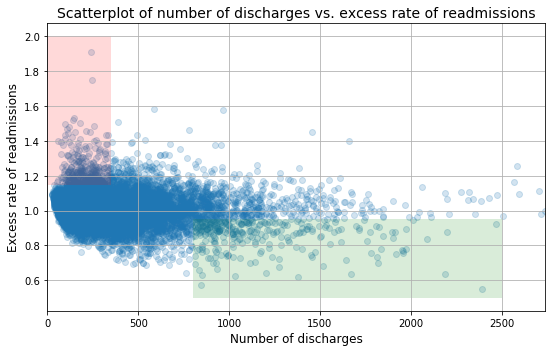

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
from scipy import stats
import seaborn as sns

### A) Do you agree with the above analysis and recommendations? Why or why not?

The observations and statistical analysis are sound in the above argument, however, I do have some differing opinions when it comes to the conclusions and recommendations sections. First of all, just from the eye-test' I wouldn't call the relationship 'significant'. There is definitely a correlation, however the line is fairly flat and other variables can definitely be playing a factor here. Instead of guessing that the correleation is significant or not, I plotted a linear regression of the data at included its Pearson correlation coefficient.

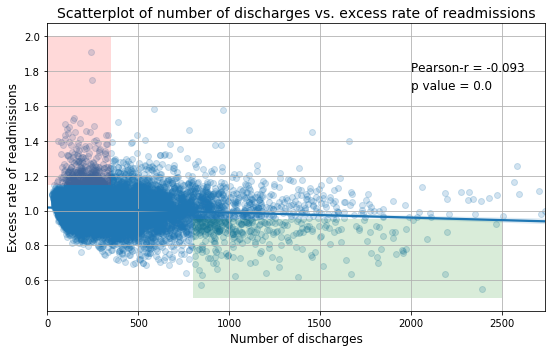

In [7]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

corr = stats.pearsonr(x,y)

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)
sns.regplot('Number of Discharges', 'Excess Readmission Ratio',clean_hospital_read_df, scatter=False )

plt.text(x=2000, y=1.8, s= 'Pearson-r = '+str(round(corr[0],3)), fontsize = 12)
plt.text(x=2000, y=1.7, s= 'p value = '+str(round(corr[1],5)), fontsize = 12)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)
ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)


ax.grid(True)
fig.tight_layout()

The chart above shows that the pearson correlation coefficient is at a -.093. This is a fairly small value and I would not call the correlation significant.

Considering only the available data, the variance of the excess readmission ratio could be analyzed a bit further. Since there are a fewer number of hospitals with 1000+ number of discharges, the variance of the excess ratio could be higher than smaller hospitals. This could lead to an average ratio smaller than the true mean value. Comparing the average excess ratio of bigger and smaller hospitals to the total mean could yield interesting results.

Consolidating hospitals to increase capacity could be a viable solution, but the hospitals that will take in the patients will have to be ugraded. The distance patients would need to travel could also increase significantly if their hospital is shutting down and sending patients elswhere. I would've taken the approach that smaller, or more rurally located hospitals, should be subsidized and given a higher standard of resources in order to better treat their patients. 



### B) Provide support for your arguments and your own recommendations with a statistically sound analysis:


#### Hypothesis Test

$H_{0}$ = The average excess readmissions ratio for hospitals with less than 300 discharges is equal to that of hospitals with over 300 discharges.

$H_{A}$ = The average excess reamissions ratio is different for hospitals with less than 300 discharges is equal to that of hospitals with over 300 discharges.

In [8]:
exp_rr = clean_hospital_read_df['Expected Readmission Rate']
pred_rr = clean_hospital_read_df['Predicted Readmission Rate']
excess_rr = clean_hospital_read_df['Excess Readmission Ratio'].dropna()

num_r = clean_hospital_read_df['Number of Readmissions']
num_d = clean_hospital_read_df['Number of Discharges']

#mean excess ratio of all hosptals
avg_exc_rr = excess_rr.mean()
std_exc_rr = excess_rr.std()                                          
print('Total average excess ratio =',avg_exc_rr,)
print('Standard deviation excess ratio =',std_exc_rr,'\n')

small = clean_hospital_read_df.loc[num_d < 300]
big = clean_hospital_read_df.loc[num_d > 300]

#Number of small hospitals, <300 discharges
num_small = excess_rr.loc[num_d < 300].count()

#mean and std of excess ratio for small hospitals
avg_exc_rr_small = excess_rr.loc[num_d < 300].mean()
std_exc_rr_small = excess_rr.loc[num_d < 300].std()

#same values for large hospitals, >1000 discharges
num_big = excess_rr.loc[num_d > 300].count()
avg_exc_rr_big = excess_rr.loc[num_d > 300].mean()
std_exc_rr_big = excess_rr.loc[num_d > 300].std()

print('# of small hospitals (<300 discharges) =',num_small)
print('Average excess ratio =',avg_exc_rr_small)
print('Standard Deviation of excess ratio =',std_exc_rr_small)
print('\n')
print('# of big hospitals (>300 discharges) =',num_big)
print('Average excess ratio =',avg_exc_rr_big)
print('Standard Deviation of excess ratio  =',std_exc_rr_big)

Total average excess ratio = 1.0075037835957146
Standard deviation excess ratio = 0.09196426603297854 

# of small hospitals (<300 discharges) = 6108
Average excess ratio = 1.0142382121807445
Standard Deviation of excess ratio = 0.08247820844558373


# of big hospitals (>300 discharges) = 5365
Average excess ratio = 0.9997810438024227
Standard Deviation of excess ratio  = 0.10123449852533903


Looking at the numbers above, we can see that the average excess ration for the different sizes of hospitals are slightly different, with small hospitals having an a higher ratio. We will want to determine whether or not that difference of mean is statisticall significant. First let's take a look at the distributions of each.

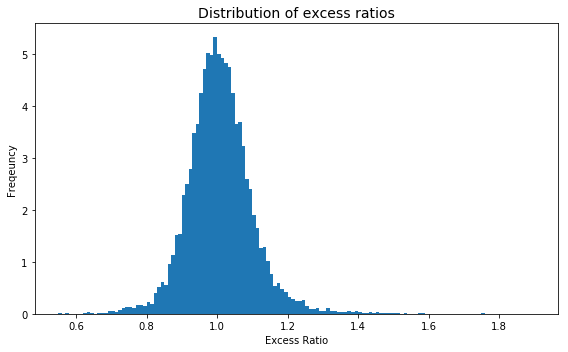

In [9]:
plt.clf()
plt.figure(figsize=(8,5))
plt.hist(excess_rr, bins = np.arange(excess_rr.min(), excess_rr.max(),.01), normed = True)

plt.xlabel('Excess Ratio')
plt.ylabel('Freqeuncy')
plt.title('Distribution of excess ratios', fontsize=14)

plt.tight_layout()
plt.show()


In [10]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

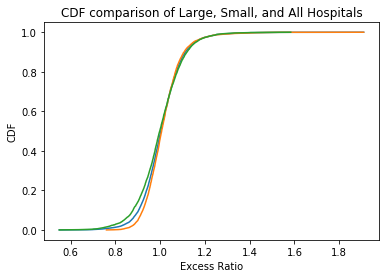

In [11]:
x_tot,y_tot = ecdf(excess_rr)
x_sm, y_sm = ecdf(excess_rr.loc[num_d < 300])
x_big, y_big = ecdf(excess_rr.loc[num_d >300])

#plot the 

plt.plot(x_tot,y_tot)
plt.plot(x_sm, y_sm)
plt.plot(x_big, y_big)

plt.xlabel('Excess Ratio')
plt.ylabel('CDF')
plt.title('CDF comparison of Large, Small, and All Hospitals')

plt.show()

In the chart above, we can see that the distribution of Excess ratios among large and small hospitals are fairly similar, with a little bit of a deviance from the total distrubtion towards the bottom tail. We can also notice that all the distributions are pretty close to normally distributed. Let's now take bootstrap permutations of the data and see whether or not the difference in the means is significant. 

#### 2) Compute and report the observed significance value (or p-value).

In [12]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

# difference of means function
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [13]:
exc_rr_small = small['Excess Readmission Ratio'].dropna()
exc_rr_big = big['Excess Readmission Ratio'].dropna()

# Calculate the difference of means between small and big hospitals
diff_means = avg_exc_rr_small - avg_exc_rr_big

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(exc_rr_small, exc_rr_big, diff_of_means, size=100000)



In [14]:
# Compute p-value: p
p = np.sum(perm_replicates >= diff_means) / len(perm_replicates)

# Print the result
print('Difference of means =', diff_means)
print('p-value =', p)

Difference of means = 0.014457168378321783
p-value = 0.0


The resulting p value is a flat 0, meaning that out of 100000 permutations, none of them exhibited a difference of means as significant as the observed value that we have. This leads us to reject the null hypothesis that small and large hospitals have the same average excess readmissions ratio.

#### 3. Report statistical significance for $\alpha$ = .01.

Considering our p value came out to be 0 in 100,000 trials, this means that the actual p value is less than .00001. This is well within $\alpha$ = .01

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The results obtained after further analyzing the situation aren't too different than what was concluded initially. I set the demarcation at 300 discharges, and took the hospitals above and below that value. The example was looking at the two extremes, and the results were still fairly similar. This tells us that the number of discharges in a hospital does have a significant effect on the excess readmissions ratio. 

I do stand by my initial thoughts that consolidating hospitals will cause too many unwanted issues. My recommendation would be still be to subsidize the hospitals with lower quality equipment. Another suggestion would be to re-evaluate the calculation for expected and predicted readmission rates. I am not sure exactly what goes into those numbers, but there could be a bias towards higher discharge numbers.

#### 5. Look at the scatterplot above.
* What are the advantages and disadvantages of using this plot to convey information?
* Construct another plot that conveys the same information in a more direct manner.

##### Advantages
1. Visualizes the data points and shows a slight negative correlation
2. Highlights the areas where the excess ratio is high for low discharge hospitals and where the ratio is low for the high discharge hospitals. 

##### Disadvantages
1. The highlight placement seems arbitrary
2. There are missing data points, the top 3 hospitals in terms of Number of Discharges are not shown
3. The data is very bunched up, could be solved by changing the x axis to a logarithmic scale


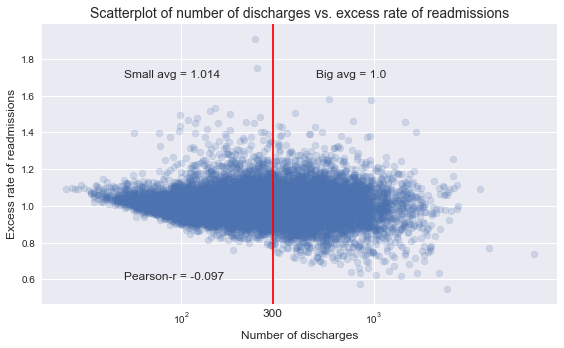

In [15]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:])

corr = stats.pearsonr(x,y)

sns.set()
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y, alpha=0.2)

plt.text(x=50, y=.6, s= 'Pearson-r = '+str(round(corr[0],3)), fontsize = 12)
plt.text(x=50, y=1.7, s= 'Small avg = '+str(round(avg_exc_rr_small,3)) , fontsize = 12)
plt.text(x=500, y=1.7, s= 'Big avg = '+str(round(avg_exc_rr_big,3)) , fontsize = 12)
plt.text(x=265, y=.4, s= '300', fontsize = 12)


plt.axvline(x = 300, color = 'red')
ax.set_xscale('log')

ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)


ax.grid(True)
fig.tight_layout()

The plot here shows everysingle excess ratio data point in the dataset, as well as stretches out the x axis to a logarithmic scale to give us a better picture of the correlation. I've also added a line at the demarcation between small and large hospitals. I threw in the average ratios for each type of hospital as well as the pearson correlation value. This way you can get quick information directly from the graph. 